<a href="https://colab.research.google.com/github/mobarakol/computer_vision_tutorial/blob/main/nocv_camera_model_calibration_formation_ellipsoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Contents
Part 1: Image Formation and Pinhole Model of the Camera
Here we discuss pinhole model of the camera and image formation. We also give an overview of camera extrinsics, camera intrinsics, and camera calibration.

Part 2: Camera Extrinsics in Python
Here we discuss camera extrinsic matrix in depth including change of basis and linear transformation in rotation and translation.

Part 3: Camera Intrinsics in Python
Here we discuss camera intrinsic matrix, and the projection transformation of the points from camera coordinate system to the image plane of the camera.

Part 4: Positive Definite Matrices and Ellipsoids
Here we discuss the properties of positive definite matrices which we'll later use in camera calibration.

Part 5: Camera Calibration in Python
Here we discuss the different methods of camera calibration in python with examples.

src: https://github.com/wingedrasengan927/Image-formation-and-camera-calibration



In [1]:
!git clone https://github.com/wingedrasengan927/Image-formation-and-camera-calibration.git
%cd Image-formation-and-camera-calibration

Cloning into 'Image-formation-and-camera-calibration'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 25 (delta 9), reused 18 (delta 5), pack-reused 0
Unpacking objects: 100% (25/25), 605.53 KiB | 2.03 MiB/s, done.


In [6]:
!pip -q install ipympl pytransform3d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.0/80.0 KB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


#Part 1 - Image formation and camera extrinsics

Totation:
 [[ 6.123234e-17  0.000000e+00 -1.000000e+00  0.000000e+00]
 [ 0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00]
 [ 1.000000e+00  0.000000e+00  6.123234e-17  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]] 
Translation:
 [[ 1.  0.  0.  0.]
 [ 0.  1.  0. -8.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


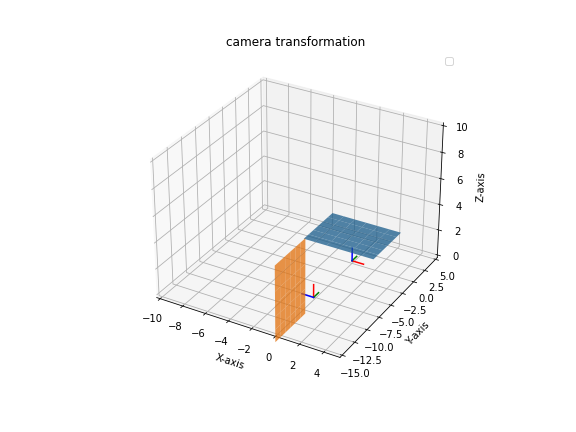

In [31]:
# %matplotlib widget
from google.colab import output
output.enable_custom_widget_manager()

import pytransform3d.rotations as pr

import matplotlib.pyplot as plt
import numpy as np
from utils import *
from utils import create_rotation_transformation_matrix, create_translation_matrix, create_image_grid, convert_homogeneous_to_grid
from utils import convert_grid_to_homogeneous

##Create transformation matrices
# rotate an angle of pi/4 along the standard Y axis
angles = [np.pi/2]
order = 'y'

# transalte by the given offset
offset = np.array([0, -8, 0])

# define parameters for the image plane
f = 2
img_size = (7, 7)

# create rotation transformation matrix
R = create_rotation_transformation_matrix(angles, order)
R_ = np.identity(4)
R_[:3, :3] = R

# create translation transformation matrix
T_ = create_translation_matrix(offset)

print('Totation:\n',R_,'\nTranslation:\n', T_)

##Transform the camera and plot it
# create an image grid
xx, yy, Z = create_image_grid(f, img_size)
# convert the image grid to homogeneous coordinates
pt_h = convert_grid_to_homogeneous(xx, yy, Z, img_size)
# transform the homogeneous coordinates
pt_h_transformed = T_ @ R_ @ pt_h
# convert the transformed homogeneous coordinates back to the image grid
xxt, yyt, Zt = convert_homogeneous_to_grid(pt_h_transformed, img_size)

# define axis and figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111,projection='3d')

# set limits
ax.set(xlim=(-10, 5), ylim=(-15, 5), zlim=(0, 10))

# plot the global basis and the transformed camera basis
ax = pr.plot_basis(ax)
ax = pr.plot_basis(ax, R, offset)

# plot the original and transformed image plane
ax.plot_surface(xx, yy, Z, alpha=0.75)
ax.plot_surface(xxt, yyt, Zt, alpha=0.75)

ax.set_title("camera transformation")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.legend()


# from google.colab import output
# output.disable_custom_widget_manager()


#Part 2 - Camera Intrinsics and Image Formation

Text(0.5, 0, 'Z-axis')

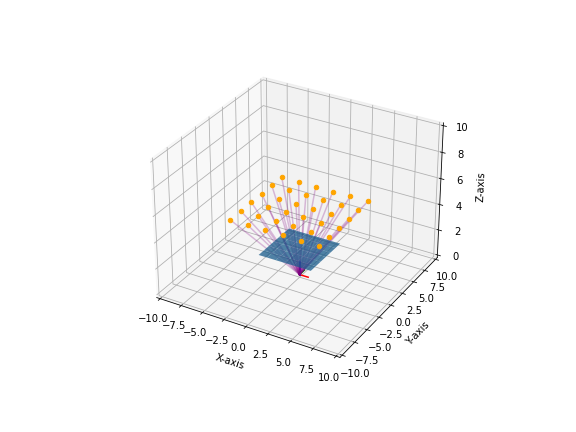

In [33]:
%matplotlib widget

import matplotlib.pyplot as plt
from utils import *

# define parameters
# points
n_points = 6
xlim = (-5, 5)
ylim = (-5, 5)
elevation = 5

# image plane
img_size = (7, 7)
f = 2

points = create_same_plane_points(n_points, xlim, ylim, elevation)
xx, yy, Z = create_image_grid(f, img_size)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111,projection='3d')

# plot image plane
ax.plot_surface(xx, yy, Z, alpha=0.75)

ax.set(xlim=(-10, 10), ylim=(-10, 10), zlim=(0, 10))
ax = pr.plot_basis(ax)

# plot the points
c = 0
for i in range(n_points):
    for j in range(n_points):
        point = points[:, c]
        ax.scatter(*point, color="orange")
        ax.plot(*make_line(origin, point), color="purple", alpha=0.25)
        c += 1
        
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

Camera Intrinsics and Image formation

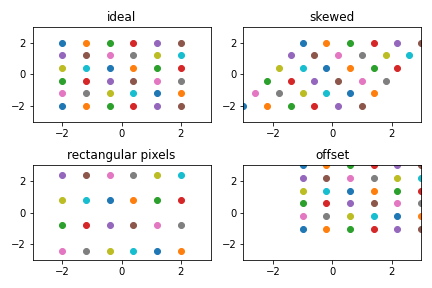

In [34]:
types = ["ideal", "skewed", "rectangular pixels", "offset"]
K1 = compute_intrinsic_parameter_matrix(2, 0, 1, 0, 0) # normal / ideal
K2 = compute_intrinsic_parameter_matrix(2, 1, 1, 0, 0) # skewed
K3 = compute_intrinsic_parameter_matrix(2, 0, 2, 0, 0) # rectangular pixels
K4 = compute_intrinsic_parameter_matrix(2, 0, 1, 1, 1) # offset

projection_points1 = compute_image_projection(points, K1)
projection_points2 = compute_image_projection(points, K2)
projection_points3 = compute_image_projection(points, K3)
projection_points4 = compute_image_projection(points, K4)

h, w = img_size
nrows = 2
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6, 4))

c = 1
for i in range(ncols):
    for j in range(nrows):
        ax = axes[i][j]
        ax.set(xlim = (-(h // 2), w // 2), ylim = (-(h // 2), w // 2))
        ax.set_title(types[c-1])
        for k in range(n_points * n_points):
                ax.scatter(*eval(f"projection_points{c}")[:, k])
        c += 1

plt.tight_layout()

Transforming the image plane

Text(0.5, 0, 'Z-axis')

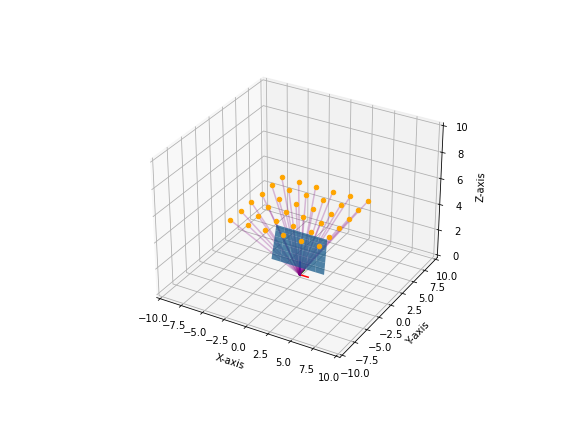

In [35]:
# 1. extract image plane points
h_grid = convert_grid_to_homogeneous(xx, yy, Z, img_size)
h_grid = h_grid[:-1, :] # remove last row as we do not need homogeneous points

# 2. transform the image plane points
K_ = K2.copy()
K_[:2, :2] = 1/f * K_[:2, :2] # nullify the effect of focal length
Kinv = np.linalg.inv(K_) # the transformation matrix is the inverse of the change of basis matrix
img_plane_points_transformed = Kinv @ h_grid

xxt, yyt, Zt = convert_homogeneous_to_grid(img_plane_points_transformed, img_size)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111,projection='3d')

# plot image plane
ax.plot_surface(xxt, yyt, Zt, alpha=0.75)

ax.set(xlim=(-10, 10), ylim=(-10, 10), zlim=(0, 10))
ax = pr.plot_basis(ax)

# plot the points
c = 0
for i in range(n_points):
    for j in range(n_points):
        point = points[:, c]
        ax.scatter(*point, color="orange")
        ax.plot(*make_line(origin, point), color="purple", alpha=0.25)
        c += 1
        
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")


#Part 3 - Positive Definite Matrices and Ellipsoid

[9. 1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


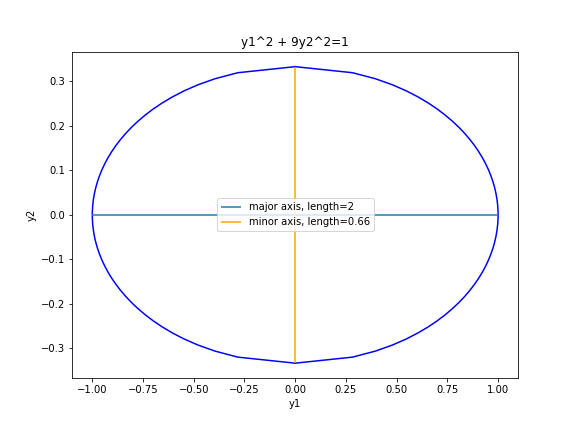

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# define our matrix A
A = np.array([[5, 4], [4, 5]])
# compute eigenvectors and eigenvalues
eigvalues, eigvectors = np.linalg.eig(A)

print(eigvalues)
print(eigvectors)

#Plot ellipsoid https://github.com/wingedrasengan927/Image-formation-and-camera-calibration/blob/master/Part%203%20-%20Positive%20Definite%20Matrices%20and%20Ellipsoid.ipynb
y2 = np.linspace(-1/3, 1/3, 50)
y1 = np.sqrt(1 - 9*np.square(y2))
plt.figure(figsize=(8, 6))
plt.plot(y1, y2, color="blue")
plt.plot(-y1, y2, color="blue")
plt.hlines(0, -1, 1, label="major axis, length=2")
plt.vlines(0, -1/3, 1/3, label="minor axis, length=0.66", color="orange")
plt.title("y1^2 + 9y2^2=1")
plt.xlabel("y1")
plt.ylabel("y2")
plt.legend()

<ipython-input-38-288e718ac27a>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


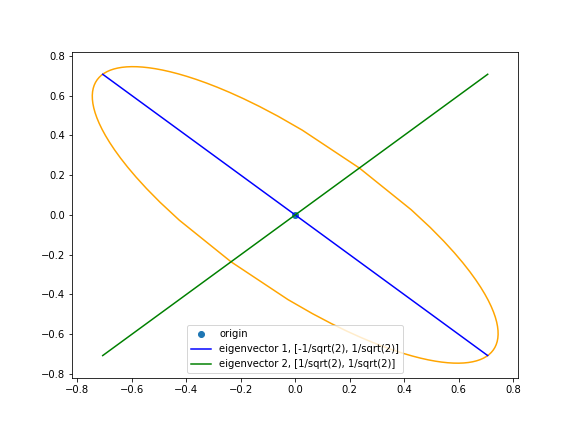

In [38]:
p1 = np.vstack((y1, y2))
p2 = np.vstack((-y1, y2))

Q = eigvectors.T

pt1 = Q @ p1
pt2 = Q @ p2

plt.figure(figsize=(8, 6))

# plot transformed points
plt.plot(pt1[0, :], pt1[1, :], color="orange")
plt.plot(pt2[0, :], pt2[1, :], color="orange")

# plot origin
plt.scatter(*np.array([0, 0]), label="origin")

# define eigenvectors
eig1 = np.array([-1/np.sqrt(2), 1/np.sqrt(2)])
eig2 = np.array([1/np.sqrt(2), 1/np.sqrt(2)])

# plot eigenvector 1
# equation of a line along a vector is p = 0 + s.v
y1 = []
x1 = np.linspace(-1, 1, 50)
for i in x1:
    y1.append(eig1 * i)
y1 = np.array(y1)
plt.plot(y1[:, 0], y1[:, 1], color="blue", label="eigenvector 1, [-1/sqrt(2), 1/sqrt(2)]")

# plot eigenvector 2
# equation of a line along a vector is p = 0 + s.v
y2 = []
x2 = np.linspace(-1, 1, 50)
for i in x2:
    y2.append(eig2 * i)
y2 = np.array(y2)
plt.plot(y2[:, 0], y2[:, 1], color="green", label="eigenvector 2, [1/sqrt(2), 1/sqrt(2)]")
plt.legend()

#Part 4 - Geometric Camera

Text(0.5, 0, 'Z-axis')

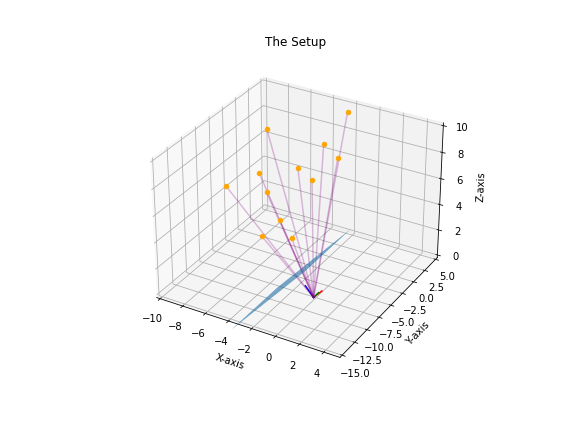

In [39]:
%matplotlib widget

import matplotlib.pyplot as plt
from utils import *
np.random.seed(42)

##Create Groundtruth matrix
# define extrinsic parameters
# -------------------------------

# rotate an angle of pi/4 along the standard Y axis
angles = [np.pi/4]
order = 'y'

# transalte by the given offset
offset = np.array([0, -8, 0])

# define intrinsic parameters
# -------------------------------
f = 2
s = 0
a = 1
cx = 0
cy = 0
img_size = (10, 10)

##Create Extrinsic and Intrinsic Matrix
# create extrinsic matrix
# --------------------------

# create rotation transformation matrix
R = create_rotation_transformation_matrix(angles, order)
R_ = np.identity(4)
R_[:3, :3] = R

# create translation transformation matrix
T_ = create_translation_matrix(offset)

E = np.linalg.inv(T_ @ R_)
E = E[:-1, :]

# create intrinsic matrix
# ---------------------------
K = compute_intrinsic_parameter_matrix(f, s, a, cx, cy)

##generate random points
# choose the lower limit of the points such they're always beyond the image plane

n_points = 12
rand_points = generate_random_points(n_points, (-10, 0), (-10, 10), (f, 10))

##Plot the setup
# create an image grid
xx, yy, Z = create_image_grid(f, img_size)
# convert the image grid to homogeneous coordinates
pt_h = convert_grid_to_homogeneous(xx, yy, Z, img_size)
# transform the homogeneous coordinates
pt_h_transformed = T_ @ R_ @ pt_h
# convert the transformed homogeneous coordinates back to the image grid
xxt, yyt, Zt = convert_homogeneous_to_grid(pt_h_transformed, img_size)

# define axis and figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111,projection='3d')

# set limits
ax.set(xlim=(-10, 5), ylim=(-15, 5), zlim=(0, 10))

# plot the camera in the world
ax = pr.plot_basis(ax, R, offset)
ax.plot_surface(xxt, yyt, Zt, alpha=0.75)

# plot the generated random points
c = 0
for i in range(n_points):
    point = rand_points[:, c]
    ax.scatter(*point, color="orange")
    ax.plot(*make_line(offset, point), color="purple", alpha=0.25)
    c += 1

ax.set_title("The Setup")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

Compute Projection of these points and form image

Text(0.5, 1.0, 'projection of points in the image')

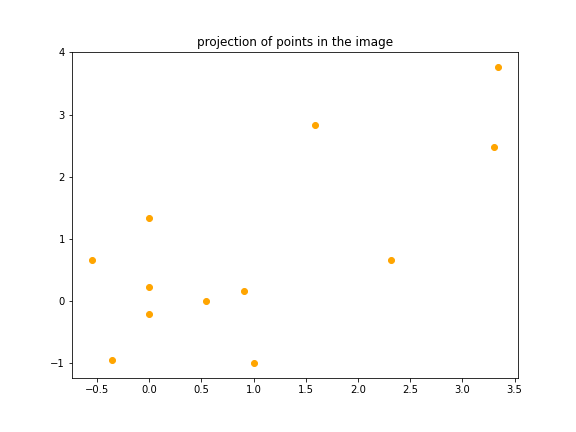

In [40]:
rand_points_camera = compute_coordniates_wrt_camera(rand_points, E, is_homogeneous=False)
projections = compute_image_projection(rand_points_camera, K)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

for i in range(n_points):
    ax.scatter(*projections.reshape(-1, 2)[i], color="orange")
    
ax.set_title("projection of points in the image")

Perform Direct Linear Calibration

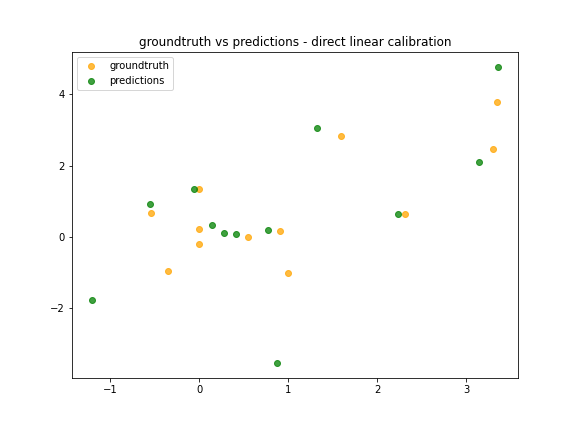

In [41]:
##Create the algebraic matrix A and find m
# compute the algebraic matrix A
A = create_algebraic_matrix(rand_points, projections)

# compute At x A
A_ = np.matmul(A.T, A)
# compute its eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(A_)
# find the eigenvector with the minimum eigenvalue
# (numpy already returns sorted eigenvectors wrt their eigenvalues)
m = eigenvectors[:, 11]

# reshape m back to a matrix
M = m.reshape(3, 4)

##Compute predictions from the calibrated matrix M
predictions = compute_world2img_projection(rand_points, M, is_homogeneous=False)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

for i in range(n_points):
    if i == 0:
        o_label = "groundtruth"
        g_label = "predictions"
    else:
        o_label = ""
        g_label = ""
        
    ax.scatter(*projections.reshape(-1, 2)[i], color="orange", alpha=0.75, label=o_label)
    ax.scatter(*predictions.reshape(-1, 2)[i], color="green", alpha=0.75, label=g_label)
    
ax.set_title("groundtruth vs predictions - direct linear calibration")
ax.legend()

Optimizing wrt Geometric Error

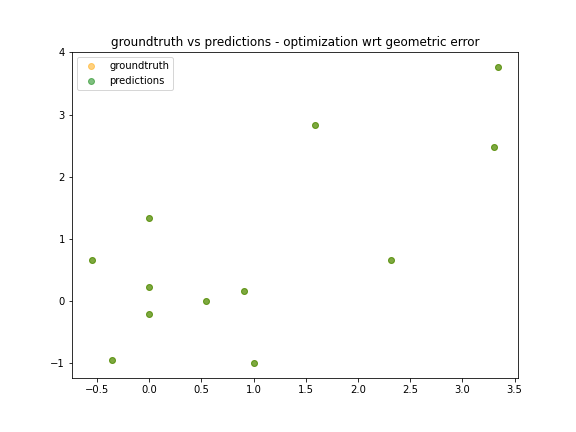

In [42]:
from scipy.optimize import minimize
result = minimize(geometric_error, m, args=(rand_points, projections))
M_ = result.x.reshape(3, 4)
predictions_v2 = compute_world2img_projection(rand_points, M_, is_homogeneous=False)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

for i in range(n_points):
    if i == 0:
        o_label = "groundtruth"
        g_label = "predictions"
    else:
        o_label = ""
        g_label = ""
        
    ax.scatter(*projections.reshape(-1, 2)[i], color="orange", alpha=0.5, label=o_label)
    ax.scatter(*predictions_v2.reshape(-1, 2)[i], color="green", alpha=0.5, label=g_label)
    
ax.set_title("groundtruth vs predictions - optimization wrt geometric error")
ax.legend()

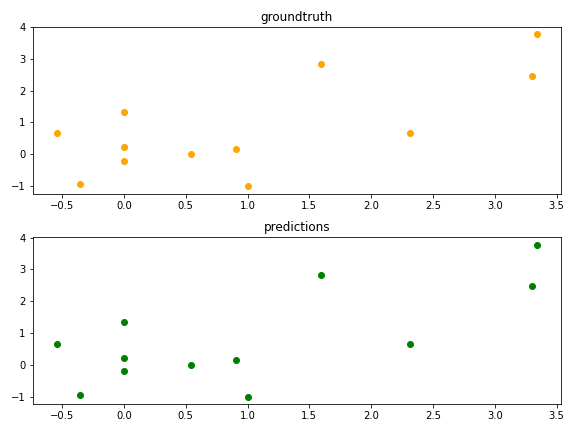

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

for i in range(n_points):
        
    axes[0].scatter(*projections.reshape(-1, 2)[i], color="orange", label=o_label)
    axes[1].scatter(*predictions_v2.reshape(-1, 2)[i], color="green", label=g_label)
    
axes[0].set_title("groundtruth")
axes[1].set_title("predictions")

plt.tight_layout()